# VERY IMPORTANT: Please make a copy (**File→Save a copy in Drive**) so that you can make changes in your file.

Submit your drive url link in the assignment submission page. Please also upload the dowloaded .ipynb file (File→Download->Download .ipynb).

Make sure you change the name of the collab page to your Name -  Assignment_2_FirstName_LastName

##Objective:

 In this assignment, you will explore the fundamentals of deep learning by working with feedforward neural networks. You will be using the Fashion MNIST dataset, which consists of grayscale images of various clothing items. Your goal is to design, train, and evaluate feedforward neural networks while experimenting with different hyperparameters, regularization techniques, and normalization methods.

- Follow the instructions for each task and provide your code and explanations where necessary.

- Dataset: Fashion-MNIST is a MNIST-like dataset of 70,000 28x28 labeled fashion images. It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

Labels
Each training and test example is assigned to one of the following labels:

Label	Description
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot


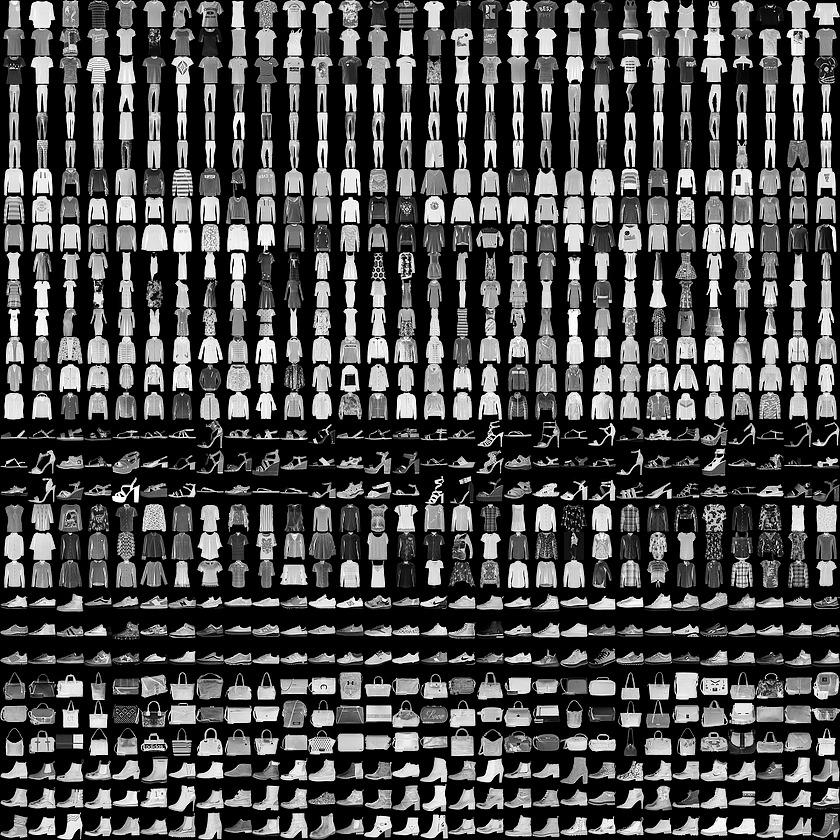


Write your code in space between `#Start code` and `#End code` in your collab notebook
```
#Start code

#End code
```


Total points: 10

In [297]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import seaborn as sns
import random

#setting the RANDOM_STATE
RANDOM_STATE = 42

In [298]:
# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Data Processing and Analysis

In [299]:
# Preprocess the data (normalize pixel values)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [300]:
# The shape of training and test dataset
print("Training dataset shape",X_train.shape)
print("Test dataset shape",X_test.shape)

Training dataset shape (60000, 28, 28)
Test dataset shape (10000, 28, 28)


In [301]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


## Task 1: Display number of images in each class
Points: 1

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
7    1000
8    1000
9    1000
dtype: int64


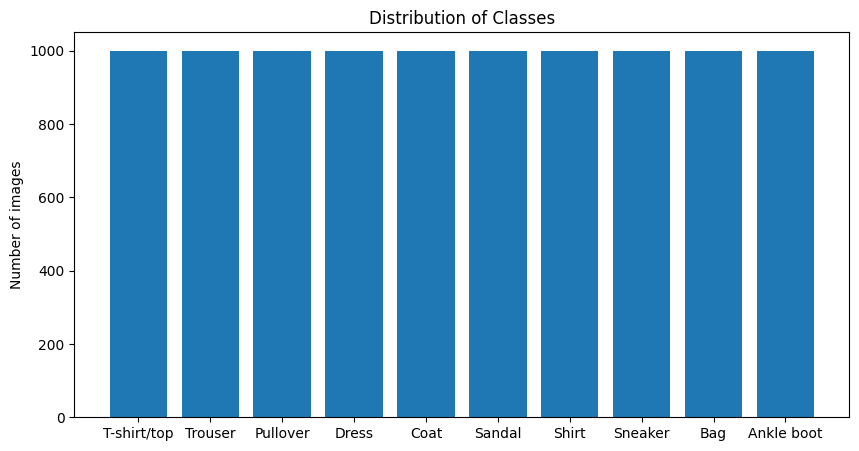

In [302]:
from pandas.core.api import Index
"""
Calculate the number of images in each class
    - pass train_labels as the parameter for the function
    - print the name of item and count
    - It should also display a bar chart

Expected output:
T-shirt/top : 5000
Trouser : 5000
.
.
.

- Bar chart showing the distribution

Points: 1

"""

def display_class_distribution(train_labels):

  #Start code
  #Create the index
  index = pd.Index(train_labels)

  #Count the number of values in the index and then sort
  count = index.value_counts().sort_index()

  print(count)

  plt.figure(figsize = (10,5))
  plt.bar(count.index, count.values)
  plt.xticks([0,1,2,3,4,5,6,7,8,9], ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
  plt.ylabel('Number of images')
  plt.title('Distribution of Classes')


  #End code

display_class_distribution(y_test)

##Task 2: Split the traing dataset intro training and validation.

Points: 1

0    1202
1    1219
2    1205
3    1184
4    1202
5    1211
6    1218
7    1159
8    1197
9    1203
dtype: int64


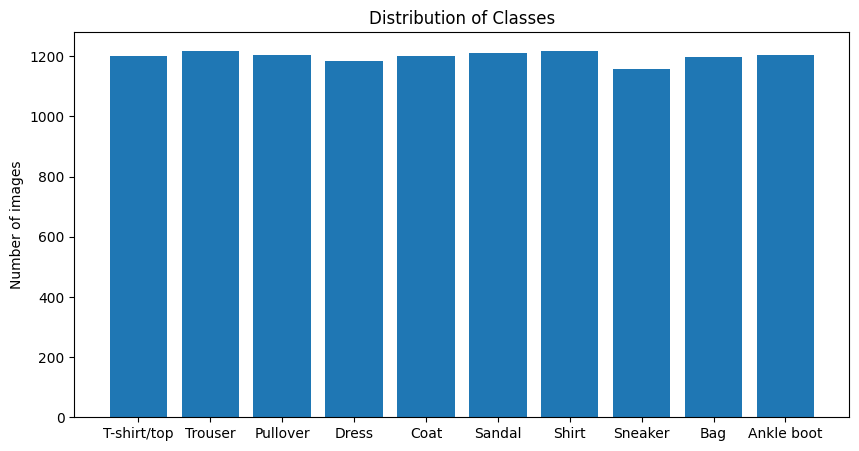

In [303]:
"""
- Use train_test_split to split the training and validation set (X_val,y_val).
    - The validation set should 20% from the original train set
    - use random_state=RANDOM_STATE

points: 1
"""
from sklearn.model_selection import train_test_split

#Start code

#Split the train and the validation set (X_val, y_val)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = RANDOM_STATE)

#End code

#Use display_class_distribution function created above to show statistics of validation dataset
display_class_distribution(y_val)

In [304]:
#Print the stats for Fashion MNIST train, validation and test dataset
print("Fashion MNIST train -  rows:",X_train.shape[0]," columns:", X_train.shape[1:4])
print("Fashion MNIST validation -  rows:",X_val.shape[0]," columns:", X_val.shape[1:4])
print("Fashion MNIST test -  rows:",X_test.shape[0]," columns:", X_test.shape[1:4])

Fashion MNIST train -  rows: 48000  columns: (28, 28)
Fashion MNIST validation -  rows: 12000  columns: (28, 28)
Fashion MNIST test -  rows: 10000  columns: (28, 28)


# Modeling

## Task 3: Create a simple DNN model

Points: 2

In [305]:
"""
Model should have :
  - Input layer
  - Hidden layer : with 128 neurons and ReLU activation
  - Output layer : with 10 classes and softmax activation

Points: 1
"""

#Start code
#Import Sequential
from keras.models import Sequential

#Import Dense and Flatten
from keras.layers import Dense
from keras.layers import Flatten

#model = #?
model = Sequential()

#Create the model

#Input layer
#Flatten - make the array to sequential
model.add(Flatten(input_shape = [28,28], name = "inputLayer"))

#Hidden layer
#Dense - Creating a hidden OR output layer
model.add(Dense(128, activation = 'relu', name = "hiddenLayer"))

#Output layer
model.add(Dense(10, activation = 'softmax', name = "outputLayer"))

#End code
model.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer (Dense)         (None, 128)               100480    
                                                                 
 outputLayer (Dense)         (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [306]:
"""
Write a function called compile_and_fit that takes following parameters - loss_fuction,optimizer, metrics, epochs, batch_size
and run compile the model and fit  and returns histroy

Usage Example:
history=compile_and_fit(model=MODEL, loss_fuction=LOSS_FUNCTION,optimizer=OPTIMIZER, metrics=METRICS, epochs=EPOCHS, batch_size=BATCH_SIZE)

Points: 1
"""
MODEL=model
LOSS_FUNCTION = "sparse_categorical_crossentropy"
OPTIMIZER = "sgd"
METRICS = ["accuracy"]
EPOCHS=15
BATCH_SIZE=32

def compile_and_fit(model, loss_fuction, optimizer, metrics, epochs, batch_size):
  #Start code

  #Compile model
  model.compile(optimizer = optimizer, loss = loss_fuction, metrics = metrics)

  #Fit model
  history = model.fit(X_train, y_train, epochs = epochs, validation_data = (X_val, y_val), batch_size = batch_size)

  #Return history
  return history
  #End code

history=compile_and_fit(model=MODEL,loss_fuction=LOSS_FUNCTION,optimizer=OPTIMIZER, metrics=METRICS, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.7763 - accuracy: 0.7494 - val_loss: 0.5834 - val_accuracy: 0.8055
Epoch 2/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5327 - accuracy: 0.8204 - val_loss: 0.5108 - val_accuracy: 0.8282
Epoch 3/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4834 - accuracy: 0.8344 - val_loss: 0.4783 - val_accuracy: 0.8372
Epoch 4/15
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4568 - accuracy: 0.8418 - val_loss: 0.4568 - val_accuracy: 0.8415
Epoch 5/15
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4392 - accuracy: 0.8489 - val_loss: 0.4418 - val_accuracy: 0.8456
Epoch 6/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4252 - accuracy: 0.8532 - val_loss: 0.4393 - val_accuracy: 0.8447
Epoch 7/15
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4133 - accuracy: 0.8571 - val_loss: 0.4249 - val_accuracy:

## Task 4: Create a function display_performace

Points: 1

Train Accuracy: 0.877, Validation Accuracy: 0.864


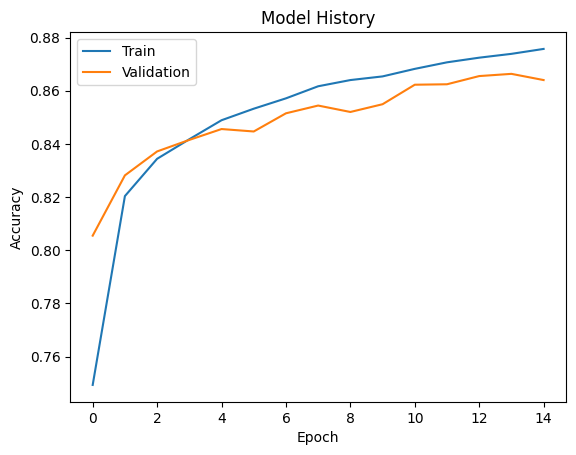

In [307]:
"""
Write a function called display_performance, that takes the model history and shows the train_accuracy and validation accuracy accross epochs
  - Extract training and validation accuracy from the model history
  - Create a plot using training and validation accuracy

Usage example:

display_performance(history)

Points: 1
"""
#Evaluate the model
_, train_acc = model.evaluate(X_train, y_train, verbose = 0)
_, val_acc = model.evaluate(X_val, y_val, verbose = 0)
print('Train Accuracy: %.3f, Validation Accuracy: %.3f' % (train_acc, val_acc))

def display_performance(history):
  #Start code

  #Plot training and validation accuracy by extracting training and validation accuracy from the model history
  plt.plot(history.history['accuracy'], label = 'Train')
  plt.plot(history.history['val_accuracy'], label = 'Validation')
  plt.title('Model History')
  plt.ylabel('Accuracy')
  plt.xlabel("Epoch")
  plt.legend()
  plt.show()

  #End code
display_performance(history)

## Task 5: Custom model with improvements

Points : 1

Suggest at least two ways to improve the model's performance. This can include architectural changes, hyperparameter tuning, or other changes.
Explain your reasoning for these suggestions.

Points: 1

Answer:
One idea I have to improve the model's performance is by adding a batch normalization. By adding a batch normalization between the hidden layer and the output layer, it should normalize the activations in each layer by adjusting and scaling them within mini-batches allowing the model's performance to improve. Using Batch Normalization should help improve during the training process.

Another idea I have to improve the model's performance is by changing the optimizer from "sgd" to "adam". By changing the optimizer to "adam", it should be more locally stable compared to "sgd" and should converge faster.



## Task 6: Apply the improvements

Points: 2

In [310]:
from sklearn.model_selection import GridSearchCV

"""
Implement some improvements you suggested on a new model called custom_model

Points: 1
"""

#Start code

#Import BatchNormalization
from keras.layers import BatchNormalization

#custom_model = ?
custom_model = Sequential()

#Create the model

#Input layer
#Flatten - make the array to sequential
custom_model.add(Flatten(input_shape = [28,28], name = "inputLayer"))

#Hidden layer
#Dense - Creating a hidden OR output layer
custom_model.add(Dense(128, activation = 'relu', name = "hiddenLayer"))

#Batch Normalization
custom_model.add(BatchNormalization())

#Output layer
custom_model.add(Dense(10, activation = 'softmax', name = "outputLayer"))

#End code

custom_model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer (Dense)         (None, 128)               100480    
                                                                 
 batch_normalization_7 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 outputLayer (Dense)         (None, 10)                1290      
                                                                 
Total params: 102282 (399.54 KB)
Trainable params: 102026 (398.54 KB)
Non-trainable params: 256 (1.00 KB)
_________________________________________________________________


In [311]:
"""
Define the paramenters for compile and fit
  - Define model,loss function, optimizer, metrics, epochs and batch_size

Points: 1
"""

#Start code

#MODEL= ?
MODEL = custom_model

#LOSS_FUNCTION = ?
LOSS_FUNCTION = "sparse_categorical_crossentropy"

#OPTIMIZER = ?
OPTIMIZER = "adam"

#METRICS = ?
METRICS = ["accuracy"]

#EPOCHS= ?
EPOCHS = 15

#BATCH_SIZE= ?
BATCH_SIZE = 20

#End code

#Run compile and fit
custom_model_history=compile_and_fit(model=MODEL,loss_fuction=LOSS_FUNCTION,optimizer=OPTIMIZER, metrics=METRICS, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/15
2400/2400 [==============================] - 12s 4ms/step - loss: 0.5150 - accuracy: 0.8199 - val_loss: 0.4255 - val_accuracy: 0.8543
Epoch 2/15
2400/2400 [==============================] - 10s 4ms/step - loss: 0.4271 - accuracy: 0.8495 - val_loss: 0.4881 - val_accuracy: 0.8301
Epoch 3/15
2400/2400 [==============================] - 10s 4ms/step - loss: 0.3969 - accuracy: 0.8579 - val_loss: 0.4083 - val_accuracy: 0.8522
Epoch 4/15
2400/2400 [==============================] - 11s 5ms/step - loss: 0.3774 - accuracy: 0.8650 - val_loss: 0.4023 - val_accuracy: 0.8587
Epoch 5/15
2400/2400 [==============================] - 9s 4ms/step - loss: 0.3623 - accuracy: 0.8682 - val_loss: 0.3941 - val_accuracy: 0.8628
Epoch 6/15
2400/2400 [==============================] - 10s 4ms/step - loss: 0.3484 - accuracy: 0.8746 - val_loss: 0.3643 - val_accuracy: 0.8723
Epoch 7/15
2400/2400 [==============================] - 11s 5ms/step - loss: 0.3410 - accuracy: 0.8762 - val_loss: 0.3676 - val_acc

Train Accuracy: 0.905, Validation Accuracy: 0.879


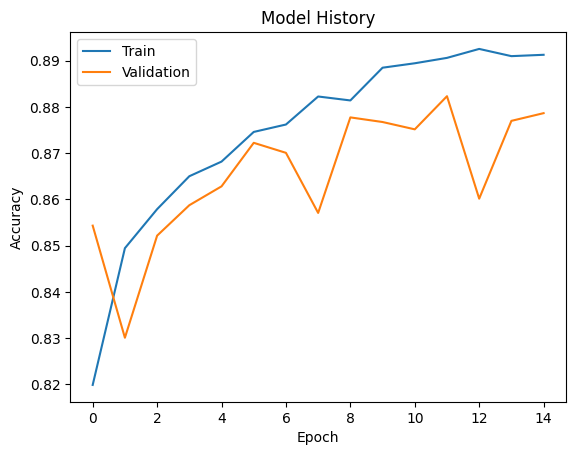

In [315]:
#display the performance of custom_model
#Evaluate the model
_, train_acc = custom_model.evaluate(X_train, y_train, verbose = 0)
_, val_acc = custom_model.evaluate(X_val, y_val, verbose = 0)
print('Train Accuracy: %.3f, Validation Accuracy: %.3f' % (train_acc, val_acc))

display_performance(custom_model_history)

# Result Analysis

## Task 7: Display the final test results

Points: 1

In [313]:
#Get the predictions for test set
y_pred = np.argmax(custom_model.predict(X_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


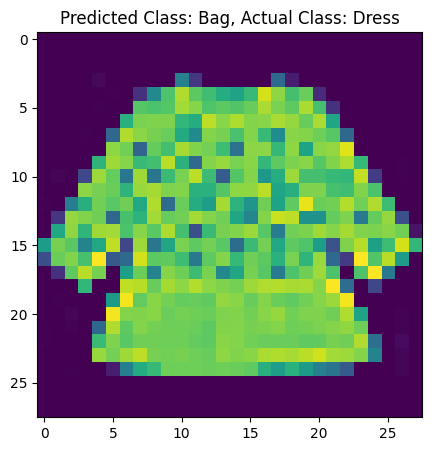

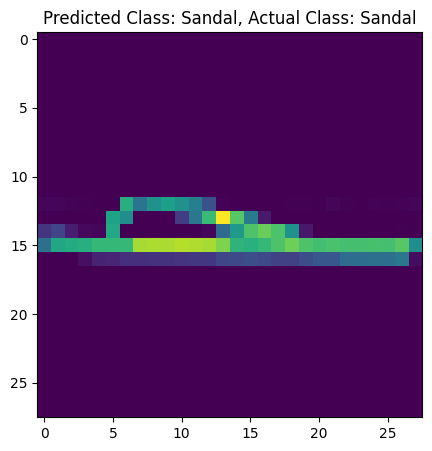

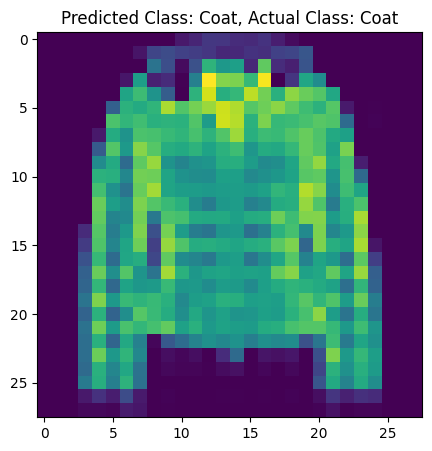

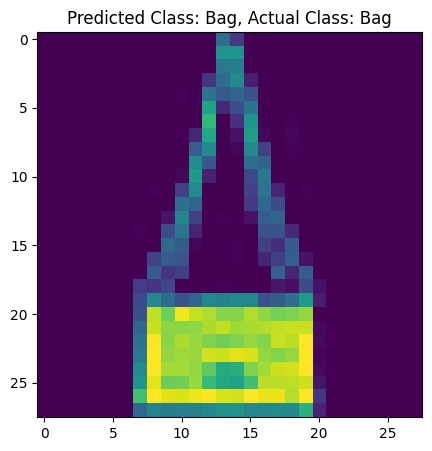

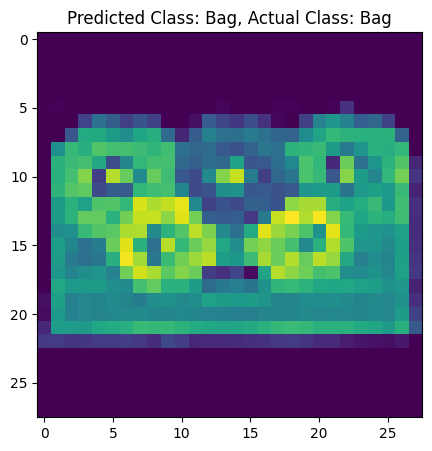

In [314]:
"""
Choose a few random images from the test set
- use random.randint to get 5 indexes from test set
- display the predicted class, actual class and corresponding class names
- use imshow function to display the image

Points: 1
"""

#Start code

#5 indexes from test set
num_samples = 5

for i in range(num_samples):
  plt.figure(figsize = (10, 5))
  index = random.randint(0, len(X_test))

  #Display predicted class, actual class, and corresponding class names
  predict_index = int(y_pred[index])
  actual_index = int(y_test[index])
  plt.title(f"Predicted Class: {class_names[predict_index]}, Actual Class: {class_names[actual_index]}")

  #Display the image
  plt.imshow(X_test[index])

  i = i + 1

#End code


## Task 8: Final Analysis

Write a report summarizing your findings and insights. Discuss the impact of various hyperparameters and other observations you made.

Points: 1

Answer:

From Assignment 2, I learned the importance of hyperparameter tuning and how hyperparameter tuning is able to make adjustments in order to get the most optimal model performance. I found it difficult to think of different ways to improve on the model performance on my own, but by using hyperparameter tuning, learned in Class 5, it would be easy to see the best hyperparameters to use in order to improve the model's performance as well as to see the test accuracy when using the "best" hyperparameters. It would have been useful to create a GridSearchCV instance perform the grid search to find the best hyperparameters to make these improvements.

